<a href="https://colab.research.google.com/github/JuanDa14Sa/QAP-instance-Genetic-algorithm/blob/main/QAP_Instance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QAP-Genetics

Vamos a resolver una instancia del problema QAP usando algoritmos genéticos. Primero cargamos los datos dados:

In [1]:
import numpy as np

dist_mat=np.array([[0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3, 4, 5, 6, 7, 4, 5,
        6, 7, 8],
       [1, 0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4, 3, 4, 5, 6, 5, 4,
        5, 6, 7],
       [2, 1, 0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4, 3, 4, 5, 6, 5,
        4, 5, 6],
       [3, 2, 1, 0, 1, 4, 3, 2, 1, 2, 5, 4, 3, 2, 3, 6, 5, 4, 3, 4, 7, 6,
        5, 4, 5],
       [4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 7, 6, 5, 4, 3, 8, 7,
        6, 5, 4],
       [1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3, 4, 5, 6, 3, 4,
        5, 6, 7],
       [2, 1, 2, 3, 4, 1, 0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4, 3,
        4, 5, 6],
       [3, 2, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 3, 4, 5, 4,
        3, 4, 5],
       [4, 3, 2, 1, 2, 3, 2, 1, 0, 1, 4, 3, 2, 1, 2, 5, 4, 3, 2, 3, 6, 5,
        4, 3, 4],
       [5, 4, 3, 2, 1, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 6, 5, 4, 3, 2, 7, 6,
        5, 4, 3],
       [2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 1, 2, 3, 4, 5, 2, 3,
        4, 5, 6],
       [3, 2, 3, 4, 5, 2, 1, 2, 3, 4, 1, 0, 1, 2, 3, 2, 1, 2, 3, 4, 3, 2,
        3, 4, 5],
       [4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2, 1, 2, 3, 4, 3,
        2, 3, 4],
       [5, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1, 0, 1, 4, 3, 2, 1, 2, 5, 4,
        3, 2, 3],
       [6, 5, 4, 3, 2, 5, 4, 3, 2, 1, 4, 3, 2, 1, 0, 5, 4, 3, 2, 1, 6, 5,
        4, 3, 2],
       [3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 1, 2,
        3, 4, 5],
       [4, 3, 4, 5, 6, 3, 2, 3, 4, 5, 2, 1, 2, 3, 4, 1, 0, 1, 2, 3, 2, 1,
        2, 3, 4],
       [5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1, 0, 1, 2, 3, 2,
        1, 2, 3],
       [6, 5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1, 0, 1, 4, 3,
        2, 1, 2],
       [7, 6, 5, 4, 3, 6, 5, 4, 3, 2, 5, 4, 3, 2, 1, 4, 3, 2, 1, 0, 5, 4,
        3, 2, 1],
       [4, 5, 6, 7, 8, 3, 4, 5, 6, 7, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 0, 1,
        2, 3, 4],
       [5, 4, 5, 6, 7, 4, 3, 4, 5, 6, 3, 2, 3, 4, 5, 2, 1, 2, 3, 4, 1, 0,
        1, 2, 3],
       [6, 5, 4, 5, 6, 5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 2, 1,
        0, 1, 2],
       [7, 6, 5, 4, 5, 6, 5, 4, 3, 4, 5, 4, 3, 2, 3, 4, 3, 2, 1, 2, 3, 2,
        1, 0, 1],
       [8, 7, 6, 5, 4, 7, 6, 5, 4, 3, 6, 5, 4, 3, 2, 5, 4, 3, 2, 1, 4, 3,
        2, 1, 0]])

flow_mat=np.array([[ 0,  3,  2,  0,  0, 10,  5,  0,  5,  2,  0,  0,  2,  0,  5,  3,
         0,  1, 10,  0,  2,  1,  1,  1,  0],
       [ 3,  0,  4,  0, 10,  0,  0,  2,  2,  1,  5,  0,  0,  0,  0,  0,
         1,  6,  1,  0,  2,  2,  5,  1, 10],
       [ 2,  4,  0,  3,  4,  5,  5,  5,  1,  4,  0,  4,  0,  4,  0,  3,
         2,  5,  5,  2,  0,  0,  3,  1,  0],
       [ 0,  0,  3,  0,  0,  0,  2,  2,  0,  6,  2,  5,  2,  5,  1,  1,
         1,  2,  2,  4,  2,  0,  2,  2,  5],
       [ 0, 10,  4,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,
         0,  2,  0,  5,  0,  2,  1,  0,  2],
       [10,  0,  5,  0,  2,  0, 10, 10,  5, 10,  6,  0,  0, 10,  2, 10,
         1,  5,  5,  2,  5,  0,  2,  0,  1],
       [ 5,  0,  5,  2,  0, 10,  0,  1,  3,  5,  0,  0,  2,  4,  5, 10,
         6,  0,  5,  5,  5,  0,  5,  5,  0],
       [ 0,  2,  5,  2,  0, 10,  1,  0, 10,  2,  5,  2,  0,  3,  0,  0,
         0,  4,  0,  5,  0,  5,  2,  2,  5],
       [ 5,  2,  1,  0,  0,  5,  3, 10,  0,  5,  6,  0,  1,  5,  5,  5,
         2,  3,  5,  0,  2, 10, 10,  1,  5],
       [ 2,  1,  4,  6,  0, 10,  5,  2,  5,  0,  0,  1,  2,  1,  0,  0,
         0,  0,  6,  6,  4,  5,  3,  2,  2],
       [ 0,  5,  0,  2,  0,  6,  0,  5,  6,  0,  0,  2,  0,  4,  2,  1,
         0,  6,  2,  1,  5,  0,  0,  1,  5],
       [ 0,  0,  4,  5,  0,  0,  0,  2,  0,  1,  2,  0,  2,  1,  0,  3,
        10,  0,  0,  4,  0,  0,  4,  2,  5],
       [ 2,  0,  0,  2,  0,  0,  2,  0,  1,  2,  0,  2,  0,  4,  5,  0,
         1,  0,  5,  0,  0,  0,  5,  1,  1],
       [ 0,  0,  4,  5,  0, 10,  4,  3,  5,  1,  4,  1,  4,  0,  0,  0,
         2,  2,  0,  2,  5,  0,  5,  2,  5],
       [ 5,  0,  0,  1,  2,  2,  5,  0,  5,  0,  2,  0,  5,  0,  0,  2,
         0,  0,  0,  6,  3,  5,  0,  0,  5],
       [ 3,  0,  3,  1,  0, 10, 10,  0,  5,  0,  1,  3,  0,  0,  2,  0,
         0,  5,  5,  1,  5,  2,  1,  2, 10],
       [ 0,  1,  2,  1,  0,  1,  6,  0,  2,  0,  0, 10,  1,  2,  0,  0,
         0,  5,  2,  1,  1,  5,  6,  5,  5],
       [ 1,  6,  5,  2,  2,  5,  0,  4,  3,  0,  6,  0,  0,  2,  0,  5,
         5,  0,  4,  0,  0,  0,  0,  5,  0],
       [10,  1,  5,  2,  0,  5,  5,  0,  5,  6,  2,  0,  5,  0,  0,  5,
         2,  4,  0,  5,  4,  4,  5,  0,  2],
       [ 0,  0,  2,  4,  5,  2,  5,  5,  0,  6,  1,  4,  0,  2,  6,  1,
         1,  0,  5,  0,  4,  4,  1,  0,  2],
       [ 2,  2,  0,  2,  0,  5,  5,  0,  2,  4,  5,  0,  0,  5,  3,  5,
         1,  0,  4,  4,  0,  1,  0, 10,  1],
       [ 1,  2,  0,  0,  2,  0,  0,  5, 10,  5,  0,  0,  0,  0,  5,  2,
         5,  0,  4,  4,  1,  0,  0,  0,  0],
       [ 1,  5,  3,  2,  1,  2,  5,  2, 10,  3,  0,  4,  5,  5,  0,  1,
         6,  0,  5,  1,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  2,  0,  0,  5,  2,  1,  2,  1,  2,  1,  2,  0,  2,
         5,  5,  0,  0, 10,  0,  0,  0,  2],
       [ 0, 10,  0,  5,  2,  1,  0,  5,  5,  2,  5,  5,  1,  5,  5, 10,
         5,  0,  2,  2,  1,  0,  0,  2,  0]])


Ahora definimos los individuos que vamos a usar, estos son permutaciones del conjunto $\{0,\dots 24\}$, donde un número $k$ en la posición $i$ representa el departamento $k$ en la localización $i$:

In [2]:
def gen_indiv(indiv_size):
    return np.random.choice(range(indiv_size),replace=False,size=indiv_size)

def gen_population(num_pop,indiv_size): #Vamos a guardar a los individuos en una lista
    return np.array([gen_indiv(indiv_size) for _ in range(num_pop)])

Definimos la función de fitness, esta va a ser el producto del flujo entre departamentos con la distancia entre localizaciones

In [3]:
def fitness(indiv,dist_mat,flow_mat):
    fitness_sum=0
    indiv_size=len(indiv)
    for i in range(indiv_size):
        for j in range(indiv_size):
            fitness_sum=fitness_sum+dist_mat[i][j]*flow_mat[indiv[i]][indiv[j]]
    return fitness_sum

def fitness_pop(population,dist_mat,flow_mat):
    return np.array([fitness(indiv,dist_mat,flow_mat) for indiv in population])

A continuación definimos los operadores geneticos, para la mutación tenemos una probabilidad que determina si el individuo va a ser mutado o vamos a convertirlo en el mejor individuo de la generación actual, esto lo hacemos para garantizar que la función de fitness decrezca(esta practica se conoce como elitismo).
En caso de que vayamos a mutar el individuo, entonces intercambiamos dos elementos.

In [4]:
def mutationv2(indiv,prob_mutate,population,fitness_pop):  #Elitismo
    if np.random.rand()<prob_mutate:
        indiv_=indiv.copy()
        tmp=np.random.choice(len(indiv),replace=False,size=2)
        i=tmp[0]
        j=tmp[1]
        indiv_[i],indiv_[j]=indiv_[j],indiv_[i]
        return indiv_
    else:
        indiv,_=currentBest(fitness_pop,population)
        return indiv
    
def mutatev2(population,prob_mutate,fitness_pop):
    tmp=[]
    for indiv in population:
        tmp.append(mutationv2(indiv,prob_mutate,population,fitness_pop))
    return tmp

Para el operador de crossover, escogemos un punto de corte, antes de este realizamos intercambios entre los dos padres, y a partir del punto, los hijos van a ser iguales a los padres. Para más información acerca de este corte, vea https://medium.com/sandstreamdev/the-genetic-algorithm-in-solving-the-quadratic-assignment-problem-9bde6ead47ab.

In [5]:
def crossover_indiv(parent1,parent2,prob_cross):
    if np.random.rand()<prob_cross:    
        cross_point=np.random.randint(0,len(parent1))
        child1, child2 = parent1.copy(),parent2.copy()
        for i in range(cross_point):
            value1,value2= child1[i],child2[i]   
            child1[np.where(child1==value2)[0]],child2[np.where(child2==value1)[0]]=value1,value2
            child1[i],child2[i]= value2,value1
        return child1,child2
    else:
        return parent1,parent2

def crossover(population,prob_cross):
    childs=[]
    num_pop=len(population)
    for i in range(0,num_pop,2):
        child1,child2=crossover_indiv(population[np.random.randint(0,num_pop)],population[np.random.randint(0,num_pop)],prob_cross)
        childs.append(child1)
        childs.append(child2)
    return np.array(childs)




Definimos una función para obtener el mejor individuo de la generación, y creamos el método para seleccionar individuos para la siguiente generación, esto lo hacemos mediante el promedio de los valores de fitness de la generación, a partir de este obtenemos una probabilidad y de esta forma escogemos a los individuos de la nueva generación. Realizando esto nos aseguramos de dejar la posibilidad a tener individuos que no tuvieron el mejor desempeño en generaciones pasadas.

In [6]:
def currentBest(fitness_pop,population): 
    index=np.argmin(fitness_pop)
    return population[index],fitness_pop[index]

def selection(fitness_pop,population): #Roulette selection method (Probabilidades basadas en el fitness)
    sum=np.sum(fitness_pop)
    prob_selection=fitness_pop/sum
    selected_indices = np.random.choice(range(len(population)),size=len(population),p=prob_selection)
    return np.take(population,selected_indices,axis=0)

Finalmente implementamos el algoritmo para obtener una solución de la instancia de QAP, utilizamos 100 individuos en cada generación y usamos 150 generaciones

In [9]:
def QAP_genetic(num_iterations,dist_mat,flow_mat,prob_cross=0.8,prob_mutate=0.2,num_pop=100,indiv_size=25):

    fitnesss=[]


    population=gen_population(num_pop,indiv_size)
    fitness_pop_=fitness_pop(population,dist_mat,flow_mat)
    current_best_indiv,current_best_score=currentBest(fitness_pop_,population)
    final_best_indiv,final_best_score=current_best_indiv,current_best_score
    for i in range(num_iterations):
        population=selection(fitness_pop_,population)
        population=crossover(population,prob_cross)

        fitness_pop_=fitness_pop(population,dist_mat,flow_mat) #Elitismo(costo extra de computación)
        population=mutatev2(population,prob_mutate,fitness_pop_)

        fitness_pop_=fitness_pop(population,dist_mat,flow_mat)
        current_best_indiv,current_best_score=currentBest(fitness_pop_,population)
        fitnesss.append(current_best_score)
        if current_best_score<final_best_score:
            final_best_indiv,final_best_score=current_best_indiv,current_best_score

    return final_best_indiv,final_best_score,fitnesss


num_iterations=150

final_best_indiv,final_best_score,fitnesss=QAP_genetic(num_iterations,dist_mat,flow_mat)

Graficamos la función de fitness durante cada generación, podemos ver que se reduce de manera considerable. Finalmente podemos ver la solución obtenida

Solución:[12 14 15  0 21 20  6 18  9 19 16 22  8  5  7 11 13 24  2  1 23  3 10 17
  4]
Función de fitness de la solución: 3876


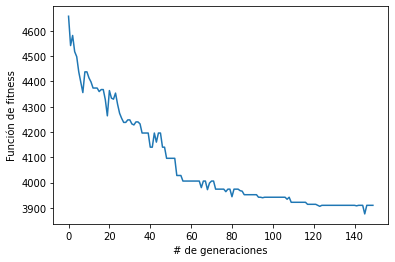

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(num_iterations),fitnesss)
plt.xlabel('# de generaciones')
plt.ylabel('Función de fitness')
print('Solución:{}\nFunción de fitness de la solución: {}'.format(final_best_indiv,final_best_score))